# Heart Disease Prediction

## Qual o objetivo em analisar esse banco de dados?

- Explorar e pré-processar os dados para acharmos o melhor modelo de classificação para esse conjunto de dados.

## Os modelos de machine learning testados nesse conjunto de dados serão:

- Decision Tree (Árvore de decisão)
- Random Forest (Floresta randômica)
- K-Nearest Neighbors (KNN)
- Regressão logística

## Explicação das variáveis do conjunto de dados
1. HeartDisease: Os entrevistados que já relataram ter doença cardíaca coronária (CHD) ou infarto do miocárdio (MI).
2. BMI: Índice de Massa Corporal (IMC).
3. Smoking: Você fumou pelo menos 100 cigarros em toda a sua vida? (A resposta sim ou não).
4. AlcoholDrinking: bebedores pesados (homens adultos que bebem mais de 14 bebidas por semana e mulheres adultas que bebem mais de 7 bebidas por semana)
5. Stroke: você teve um derrame?
6. PhysicalHealth: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).
7. MentalHealth : Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).
8. DiffWalking : Você tem sérias dificuldades para caminhar ou subir escadas?
9. Sex: Você é homem ou mulher?
10. AgeCategory: Categoria de idade dividida em quatorze faixas etárias.
11. Race: Qual a sua raça?
12. Diabetic: Você tinha diabetes?
13. PhysicalActivity: Adultos que relataram fazer atividade física ou exercício durante os últimos 30 dias, além de seu trabalho regular.
14. GenHealth: Você diria que, em geral, sua saúde é...
15. SleepTime: Em média, quantas horas de sono você dorme em um período de 24 horas?
16. Asthma: você teve asma?
17. KidneyDisease: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?
18. SkinCancer: você teve câncer de pele?


## Importação das bibliotecas

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Lendo o banco de dados

In [2]:
dados = pd.read_csv('/content/heart_2020_cleaned.csv')

In [3]:
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


- Deixarei apenas 30.000 linhas desse banco de dados, pois já é suficiente para fins de demonstração.

In [3]:
dados = dados.drop(range(30000,319795))

In [18]:
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,No,24.33,No,No,No,0.0,0.0,No,Male,55-59,Other,No,Yes,Excellent,7.0,No,No,No
29996,Yes,27.50,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Excellent,8.0,No,No,No
29997,No,25.82,No,No,No,3.0,2.0,No,Female,60-64,White,No,No,Very good,9.0,No,No,No
29998,No,26.78,No,No,No,0.0,4.0,No,Male,25-29,White,No,Yes,Excellent,7.0,No,No,No


## Algumas estatísticas sobre as variáveis numéricas desse conjunto de dados

In [4]:
dados.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,28.059356,3.653867,3.977233,7.138767
std,6.295974,8.208709,7.934995,1.479386
min,12.400000,0.000000,0.000000,1.000000
25%,23.730000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.180000,2.000000,4.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


## Limpeza dos dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      30000 non-null  object 
 1   BMI               30000 non-null  float64
 2   Smoking           30000 non-null  object 
 3   AlcoholDrinking   30000 non-null  object 
 4   Stroke            30000 non-null  object 
 5   PhysicalHealth    30000 non-null  float64
 6   MentalHealth      30000 non-null  float64
 7   DiffWalking       30000 non-null  object 
 8   Sex               30000 non-null  object 
 9   AgeCategory       30000 non-null  object 
 10  Race              30000 non-null  object 
 11  Diabetic          30000 non-null  object 
 12  PhysicalActivity  30000 non-null  object 
 13  GenHealth         30000 non-null  object 
 14  SleepTime         30000 non-null  float64
 15  Asthma            30000 non-null  object 
 16  KidneyDisease     30000 non-null  object

In [6]:
dados.nunique()

HeartDisease           2
BMI                 2078
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             22
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [7]:
dados['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

- Como podemos ver, a variável Diabetic tem 4 valores, então transformaremos os valores "No, borderline diabetes" (que significa pré-diabetes) para No, e, "Yes (during pregnancy)" para Yes. Irei aproveitar e transformarei os valores das variáveis que possuem apenas "Yes" ou "No" para "0" e "1". Já as variáveis que possuem mais de dois possíveis valores, nós trataremos posteriormente.

In [4]:
dados = dados[dados.columns].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'No, borderline diabetes': '0', 'Yes (during pregnancy)': '1'})
dados['Diabetic'] = dados['Diabetic'].astype(int)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      29999 non-null  int64  
 1   BMI               29999 non-null  float64
 2   Smoking           29999 non-null  int64  
 3   AlcoholDrinking   29999 non-null  int64  
 4   Stroke            29999 non-null  int64  
 5   PhysicalHealth    29999 non-null  float64
 6   MentalHealth      29999 non-null  float64
 7   DiffWalking       29999 non-null  int64  
 8   Sex               29999 non-null  int64  
 9   AgeCategory       29999 non-null  object 
 10  Race              29999 non-null  object 
 11  Diabetic          29999 non-null  int64  
 12  PhysicalActivity  29999 non-null  int64  
 13  GenHealth         29999 non-null  object 
 14  SleepTime         29999 non-null  float64
 15  Asthma            29999 non-null  int64  
 16  KidneyDisease     29999 non-null  int64 

## Análise exploratória e visualização dos dados

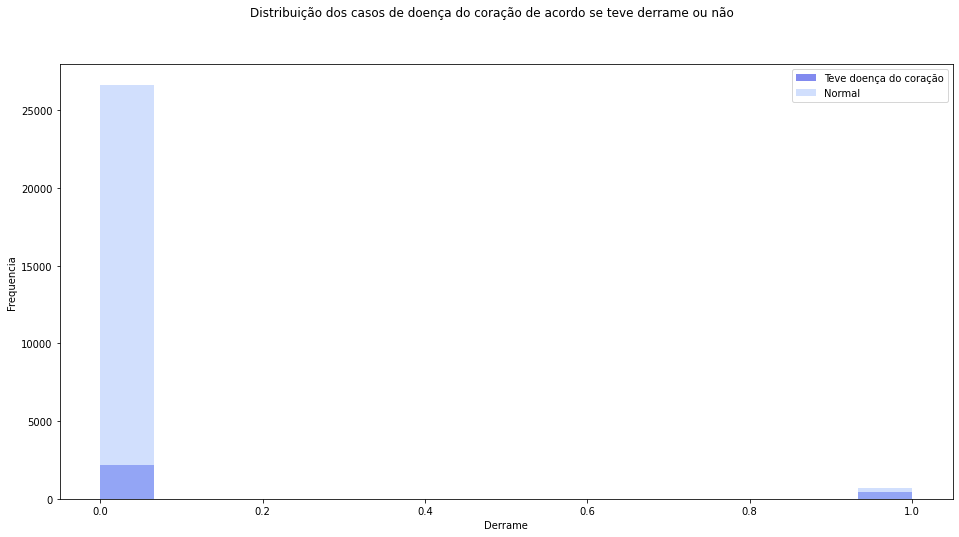

In [9]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Derrame")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se teve derrame ou não")

ax.legend();


- Lembrando que o número 1 significa "Sim" e 0 significa "Não"
- Aqui podemos observar que poucas pessoas que foram entrevistadas tiveram derrame, mas nota-se que a maioria das pessoas que passaram por isso sofreram posteriormente de doença do coração.

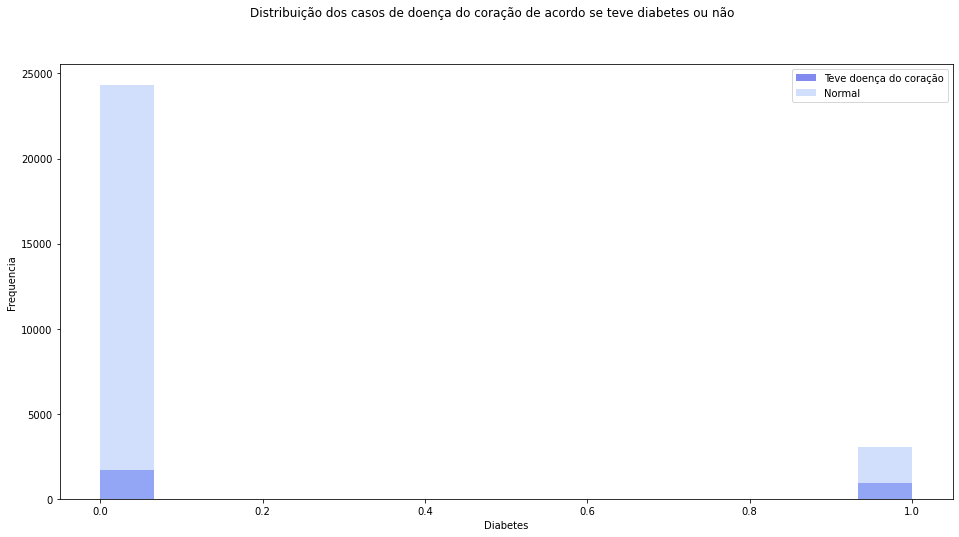

In [10]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Diabetes")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se teve diabetes ou não")

ax.legend();

- Novamente podemos observar que a maioria dos entrevistados não possuíam diabetes, mas dos que sofriam com essa doença menos da metade tiveram doença do coração.

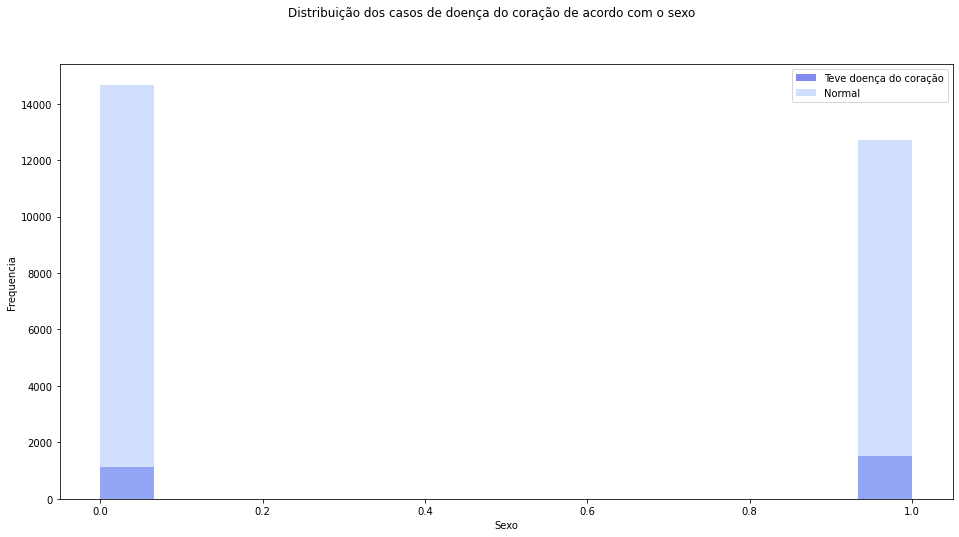

In [11]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Sexo")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo com o sexo")

ax.legend();

- Devemos nos lembrar que classificamos o numero 0 para mulher e 1 para homem
- podemos notar que:
    - há relativamente um número maior de mulheres pacientes;
    - mesmo com um menor número de pacientes homens, nota-se que possuem uma frequência maior de doença do coração se comparado com as mulheres;

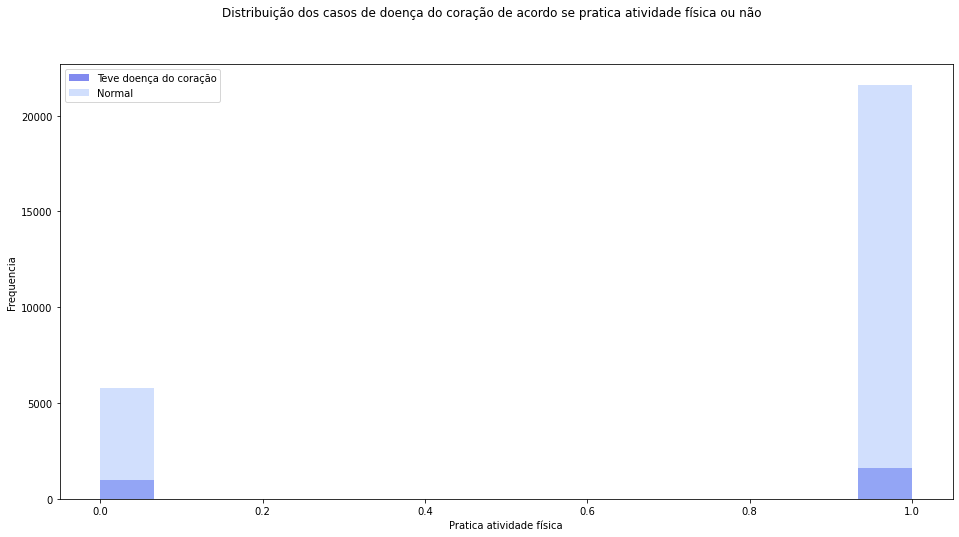

In [12]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["PhysicalActivity"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["PhysicalActivity"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Pratica atividade física")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se pratica atividade física ou não")

ax.legend();

- Aqui podemos ver que a maioria dos entrevistados praticaram atividade física nos últimos 30 dias. Olhando agora para as frequências podemos imaginar que quem pratica atividade física tem menos chances de possuir doenças do coração.

## Análise de colinearidade

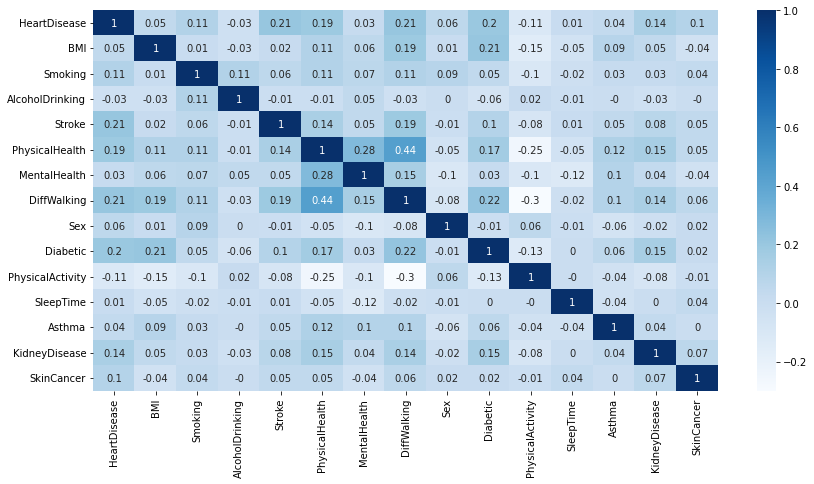

In [13]:
correlation = dados.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

-Como podemos observar, nenhuma variável tem grande influência sobre outra. As variáveis que possuem a correlação mais alta são DiffWalking (dificuldade de andar) com PhysicalHealth (saúde fisica) e mesmo assim não é uma grande correlação.
-Seguiremos com todas as variáveis para o modelos

## Pré-processamento dos dados

### Escalonamento

In [5]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
dados[num_cols] = Scaler.fit_transform(dados[num_cols])

### OneHotEncoder

In [6]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

categ = dados[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

dados = pd.concat([dados, encoded_categ], axis = 1)

dados = dados.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      30000 non-null  int64  
 1   BMI               30000 non-null  float64
 2   Smoking           30000 non-null  int64  
 3   AlcoholDrinking   30000 non-null  int64  
 4   Stroke            30000 non-null  int64  
 5   PhysicalHealth    30000 non-null  float64
 6   MentalHealth      30000 non-null  float64
 7   DiffWalking       30000 non-null  int64  
 8   Sex               30000 non-null  int64  
 9   Diabetic          30000 non-null  int64  
 10  PhysicalActivity  30000 non-null  int64  
 11  SleepTime         30000 non-null  float64
 12  Asthma            30000 non-null  int64  
 13  KidneyDisease     30000 non-null  int64  
 14  SkinCancer        30000 non-null  int64  
 15  0                 30000 non-null  float64
 16  1                 30000 non-null  float6

## Dividindo o conjunto de dados em variáveis explicativas e variável respota. Nesse caso a nossa variável de interesse (variável resposta) é a HearthDisease

In [7]:
explicativas = dados.drop(columns =['HeartDisease'], axis = 1)

resposta = dados['HeartDisease']

In [8]:
explicativas = explicativas.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True).values
resposta = resposta.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True).values

## Tuning dos parâmetros com GridSearchCV

### Decision Tree

In [9]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 5]}

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
0.900596932822137


### Random Forest

In [11]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 5]}

In [12]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 40}
0.914897160637884


### K-Nearest Neighbors (KNN)

In [18]:
parametros = {'n_neighbors': [3, 5, 10],
              'p': [1, 2]}

In [19]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 10, 'p': 2}
0.9117304106239927



### Regressão Logística

In [9]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [13]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9140666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Cross-Validation

In [15]:
resultados_arvore = []
resultados_floresta = []
resultados_knn = []
resultados_logistica = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  #decision tree
  arvore = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=5, splitter='random')
  scores = cross_val_score(arvore, explicativas, resposta, cv = kfold)
  resultados_arvore.append(scores.mean())

  #random forest
  random_forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split=2, n_estimators = 40)
  scores = cross_val_score(random_forest, explicativas, resposta, cv = kfold)
  resultados_floresta.append(scores.mean())

  #knn
  knn = KNeighborsClassifier(n_neighbors = 10, p = 2)
  scores = cross_val_score(knn, explicativas, resposta, cv = kfold)
  resultados_knn.append(scores.mean())
  #regressão logistica
  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, explicativas, resposta, cv = kfold)
  resultados_logistica.append(scores.mean())





0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


12


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


14


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


15


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


17


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


18


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


19


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


20


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


21


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


22


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


23


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


24


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


25


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


26


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


27


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


28


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


29


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [16]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_floresta,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica})
resultados

,Arvore,Random forest,KNN,Logistica
0,0.901333,0.914367,0.913000,0.914900
1,0.901933,0.914767,0.912500,0.914500
2,0.902467,0.914767,0.912567,0.914267
3,0.903500,0.914700,0.912300,0.914700
4,0.902100,0.914733,0.912467,0.914733
5,0.901367,0.914667,0.912667,0.914600
6,0.903467,0.915067,0.912500,0.914500
7,0.902467,0.914767,0.912333,0.914467
8,0.902200,0.914300,0.912067,0.914533
9,0.903067,0.914567,0.912733,0.914433


In [17]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica
count,30.000000,30.000000,30.000000,30.000000
mean,0.902180,0.914671,0.912389,0.914558
std,0.000829,0.000271,0.000262,0.000161
min,0.900567,0.913933,0.911900,0.914267
25%,0.901800,0.914467,0.912233,0.914475
50%,0.902033,0.914700,0.912400,0.914517
75%,0.902467,0.914792,0.912558,0.914683
max,0.904567,0.915200,0.913000,0.914900


## Teste de normalidade dos resultados

In [20]:
shapiro(resultados_arvore), shapiro(resultados_floresta), shapiro(resultados_knn), shapiro(resultados_logistica)

((0.9404011368751526, 0.09324994683265686),
 (0.9600013494491577, 0.30979907512664795),
 (0.9825918674468994, 0.8894730806350708),
 (0.9631190299987793, 0.3712203800678253))

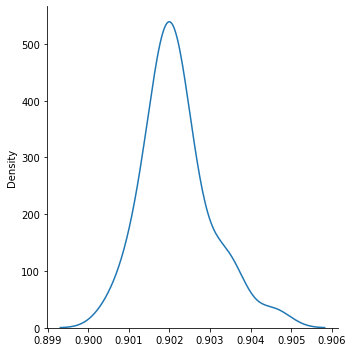

In [21]:
sns.displot(resultados_arvore, kind = 'kde');

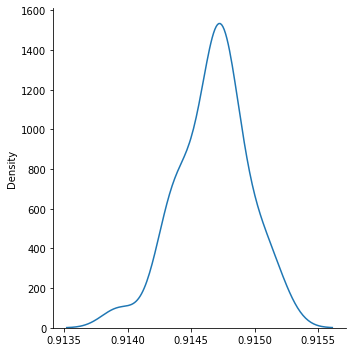

In [22]:
sns.displot(resultados_floresta, kind = 'kde');

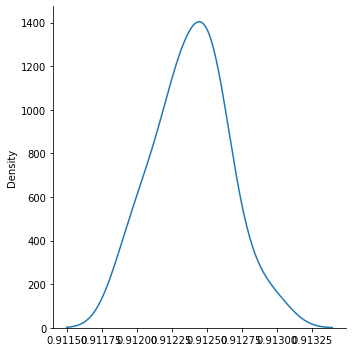

In [23]:
sns.displot(resultados_knn, kind = 'kde');

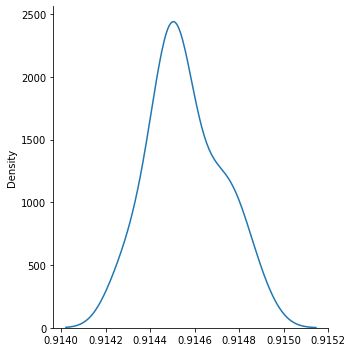

In [24]:
sns.displot(resultados_logistica, kind = 'kde');

No teste de Shapiro-Wilk temos que a hipótese nula é que os dados seguem normalidade, dito isso, podemos afirmar que nós não rejeitamos a hipótese nula com 95% de confiança, pois todos os valores obtidos através do teste foram maiores que 0,05.

## Teste de hipótese com ANOVA e Tukey

In [29]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_floresta, resultados_knn, resultados_logistica]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica']}

In [30]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.901333,arvore
1,0.901933,arvore
2,0.902467,arvore
3,0.903500,arvore
4,0.902100,arvore
...,...,...
115,0.914500,logistica
116,0.914433,logistica
117,0.914533,logistica
118,0.914833,logistica


In [32]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [33]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   arvore           knn   0.0102  0.001  0.0099 0.0105   True
   arvore     logistica   0.0124  0.001  0.0121 0.0127   True
   arvore random_forest   0.0125  0.001  0.0122 0.0128   True
      knn     logistica   0.0022  0.001  0.0019 0.0025   True
      knn random_forest   0.0023  0.001   0.002 0.0026   True
logistica random_forest   0.0001 0.7533 -0.0002 0.0004  False
-------------------------------------------------------------


- De acordo com o teste de Tukey podemos afirmar que não rejeitamos a hipótese nula apenas para as médias da Regressão Logística e do Random Forest, isso significa que a média desses algoritmos não diferem estatísticamente com 95% de confiança.

In [34]:
resultados.mean()

Arvore           0.902180
Random forest    0.914671
KNN              0.912389
Logistica        0.914558
dtype: float64

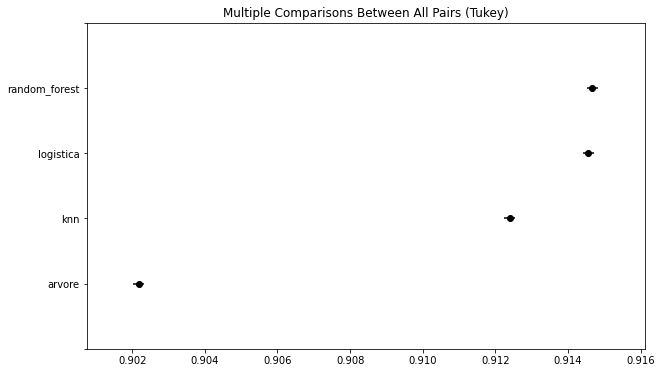

In [35]:
teste_estatistico.plot_simultaneous();

- Dado que as médias dos algoritmos de Random Forest e Regressão Logística são estatisticamente iguais, iremos usar o algoritmo de Regressão Logística para esses dados, pois possuem o desvio padrão menor que o Random Forest.

## Aplicando o algoritmo de Regressão Logística

In [43]:
x_train, x_test, y_train, y_test = train_test_split(explicativas,resposta,test_size=0.3,random_state=77)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21000, 38), (21000,), (9000, 38), (9000,))

In [56]:
logistica = LogisticRegression(C =  1.0, solver = 'lbfgs', tol= 0.0001, random_state=77)
logistica.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=77)

In [74]:
previsoes_log = logistica.predict(x_test)
previsoes_log

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [75]:
accuracy_score(y_test, previsoes_log)

0.9168888888888889

0.9168888888888889

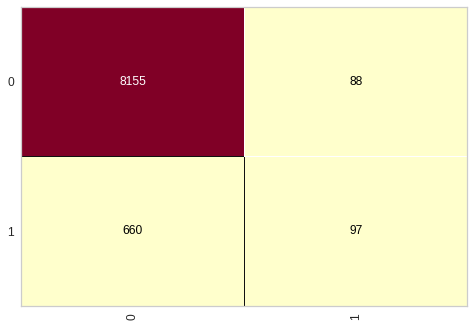

In [60]:
cm = ConfusionMatrix(logistica)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [76]:
print(classification_report(y_test, previsoes_log))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8243
           1       0.52      0.13      0.21       757

    accuracy                           0.92      9000
   macro avg       0.72      0.56      0.58      9000
weighted avg       0.89      0.92      0.89      9000



Aqui podemos observar que o algoritmo de Regressão Logística consegue prever 99% de todas as pessoas que não vão possuir doença do coração e desses, 93% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 13% e desses, ele consegue acertar em 52% dos casos.

## Aplicando o algoritmo K-Nearest Neighbors (KNN)

In [68]:
knn = KNeighborsClassifier(n_neighbors=10, p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
previsoes_knn = knn.predict(x_test)
previsoes_knn

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
accuracy_score(y_test, previsoes_knn)

0.9142222222222223

0.9142222222222223

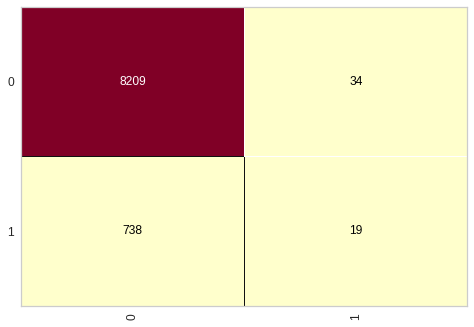

In [72]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [73]:
print(classification_report(y_test, previsoes_knn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8243
           1       0.36      0.03      0.05       757

    accuracy                           0.91      9000
   macro avg       0.64      0.51      0.50      9000
weighted avg       0.87      0.91      0.88      9000



Aqui podemos observar que o algoritmo KNN consegue prever 100% de todas as pessoas que não vão possuir doença do coração e desses, 92% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 3% e desses, ele consegue acertar em 36% dos casos.

## Aplicação do algoritmo Decision Tree

In [88]:
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 5, splitter = 'random', random_state = 77)
dt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=77,
                       splitter='random')

In [89]:
previsoes_dt = dt.predict(x_test)
previsoes_dt

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
accuracy_score(y_test, previsoes_dt)

0.8997777777777778

0.8997777777777778

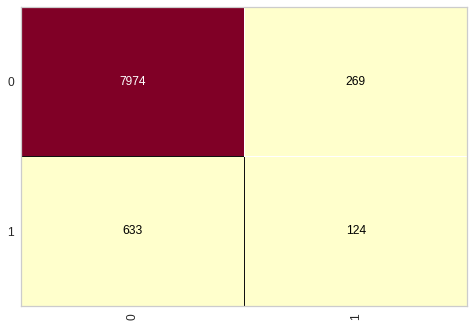

In [91]:
cm = ConfusionMatrix(dt)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [92]:
print(classification_report(y_test, previsoes_dt))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8243
           1       0.32      0.16      0.22       757

    accuracy                           0.90      9000
   macro avg       0.62      0.57      0.58      9000
weighted avg       0.88      0.90      0.88      9000



Aqui podemos observar que o algoritmo Decision Tree consegue prever 97% de todas as pessoas que não vão possuir doença do coração e desses, 93% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 16% e desses, ele consegue acertar em 32% dos casos.

## Aplicando o algoritmo Random Forest

In [93]:
rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 2, n_estimators = 40, random_state = 77)
rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=40, random_state=77)

In [94]:
previsoes_rf = rf.predict(x_test)
previsoes_rf

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [96]:
accuracy_score(y_test, previsoes_rf)

0.9184444444444444

0.9184444444444444

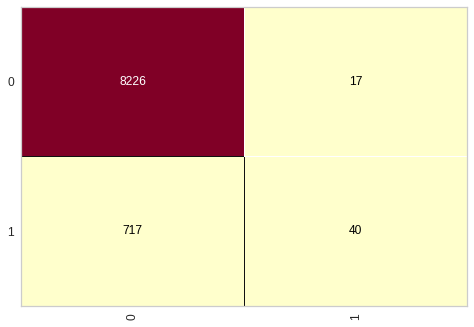

In [97]:
cm = ConfusionMatrix(rf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [98]:
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8243
           1       0.70      0.05      0.10       757

    accuracy                           0.92      9000
   macro avg       0.81      0.53      0.53      9000
weighted avg       0.90      0.92      0.89      9000



Aqui podemos observar que o algoritmo Random Forest consegue prever 100% de todas as pessoas que não vão possuir doença do coração e desses, 92% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 5% e desses, ele consegue acertar em 70% dos casos.

# Conclusão

- De acordo com toda a análise podemos obervar que o algoritmo que mais se adaptou com os dados e com os parâmetros escolhidos pelo GridSearch foi a Regressão Logística com 91,69% de precisão. O algoritmo Random Forest apesar de ter tido uma precisão maior, ele conseguiu prever menos os pacientes que teriam doença no coração.
- Infelizmente nenhum dos algoritmos se saiu bem em prever quem teria doença no coração.